In [1]:
"""
EXPLORATORY DATA ANALYSIS FOR THE MACHINE LEARNING MODELS

This Jupyter notebook will explore basic summary statistics and correlations to predict which explanatory X variables are of 
significance to predicting the response Y variable.

We will study the relationships between variables using various visualizations and statistical metrics to give context to the predictive model.

"""

'\nEXPLORATORY DATA ANALYSIS FOR THE MACHINE LEARNING MODELS\n\nThis Jupyter notebook will explore basic summary statistics and correlations to predict which explanatory X variables are of \nsignificance to predicting the response Y variable.\n\nWe will study the relationships between variables using various visualizations and statistical metrics to give context to the predictive model.\n\n'

In [2]:
""" IMPORTING RELEVANT LIBRARIES AND DEPENDENCIES """

' IMPORTING RELEVANT LIBRARIES AND DEPENDENCIES '

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np

In [4]:
""" DATASET 1: MAX_RATING """

' DATASET 1: MAX_RATING '

In [5]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
AAPL_data_df = df = pd.read_csv("max_rating.csv")


# Review the DataFrame
AAPL_data_df

,Date,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,...,JNK,JNK % Change,50 MA,200 MA,Max Sharpe % Change By Weights,1 YR,5 YR,30 YR,Signal,Unnamed: 24
0,2023-08-18 04:00:00+00:00,175.33,-0.000237,80.44,0.000087,72.79,0.000105,60.95,-0.000109,215.49,...,90.840000,0.000104,0.000000,1.600437,1.633654,5.350000,4.380000,4.380000,0,1000.000000
1,2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,...,90.800000,-0.000440,0.001484,1.600437,1.633654,5.360000,4.420000,4.410000,1,1001.484498
2,2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,...,91.230000,0.004736,0.009146,1.600437,1.633654,5.370000,4.420000,4.380000,1,1009.145599
3,2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,...,91.470000,0.002631,0.011147,1.600437,1.633654,5.360000,4.360000,4.320000,1,1011.146535
4,2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,...,91.760000,0.003170,0.012008,1.600437,1.633654,5.370000,4.360000,4.290000,1,1012.008056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,2015-12-07 05:00:00+00:00,102.67,-0.001653,78.87,0.000888,11.72,0.003425,43.20,0.004418,231.13,...,102.128524,0.000000,0.005059,1.396687,1.459326,1.639022,1.929995,2.665611,1,NaN
1938,2015-12-04 05:00:00+00:00,104.02,0.013149,79.09,0.002789,12.46,0.063140,43.29,0.002083,230.38,...,102.128524,0.000000,0.007899,1.399886,1.459466,1.639022,1.929995,2.665611,1,NaN
1939,2015-12-03 05:00:00+00:00,101.76,-0.021727,77.61,-0.018713,12.77,0.024880,42.46,-0.019173,232.71,...,102.128524,0.000000,-0.011650,1.402718,1.459572,1.639022,1.929995,2.665611,0,NaN
1940,2015-12-02 05:00:00+00:00,100.69,-0.010515,78.85,0.015977,12.48,-0.022709,42.77,0.007301,231.99,...,102.128524,0.000000,-0.000903,1.406239,1.459670,1.639022,1.929995,2.665611,0,NaN


In [6]:
""" CORRELATION HEATMAP 

In the context of your machine learning model,
this heatmap helps you identify potential multicollinearity
between independent variables, which might affect the model's performance 
or interpretation. If two independent variables are highly correlated,
it could mean they provide similar information to the model,
and you might consider removing one to avoid redundancy.

 It doesn't directly indicate the relationship between the independent variables and the excluded "Signal" variable,
 since the heatmap only considers pairwise relationships between the independent variables.

"""

' CORRELATION HEATMAP \n\nIn the context of your machine learning model,\nthis heatmap helps you identify potential multicollinearity\nbetween independent variables, which might affect the model\'s performance \nor interpretation. If two independent variables are highly correlated,\nit could mean they provide similar information to the model,\nand you might consider removing one to avoid redundancy.\n\n It doesn\'t directly indicate the relationship between the independent variables and the excluded "Signal" variable,\n since the heatmap only considers pairwise relationships between the independent variables.\n\n'

In [7]:
""" HOW TO INTERPRET THE HEATMAP 

Color Intensity: The cell color intensity shows correlation strength.
Dark blue: strong negative correlation, dark red: strong positive correlation.

Correlation Values: Numbers (-1 to 1) in cells indicate correlations. 
Positive: one variable up, other likely up; Negative: one up, other down; Close to 0: weak correlation.

Diagonal Line: Diagonal cells show correlation of each variable with itself (always 1, perfect positive correlation).

Interpretation: Dark cells suggest strong relationships. Dark blue: one up, other down; Dark red: both tend to go up.

Weak/None: Light cells show weak or no correlation.

"""

' HOW TO INTERPRET THE HEATMAP \n\nColor Intensity: The cell color intensity shows correlation strength.\nDark blue: strong negative correlation, dark red: strong positive correlation.\n\nCorrelation Values: Numbers (-1 to 1) in cells indicate correlations. \nPositive: one variable up, other likely up; Negative: one up, other down; Close to 0: weak correlation.\n\nDiagonal Line: Diagonal cells show correlation of each variable with itself (always 1, perfect positive correlation).\n\nInterpretation: Dark cells suggest strong relationships. Dark blue: one up, other down; Dark red: both tend to go up.\n\nWeak/None: Light cells show weak or no correlation.\n\n'

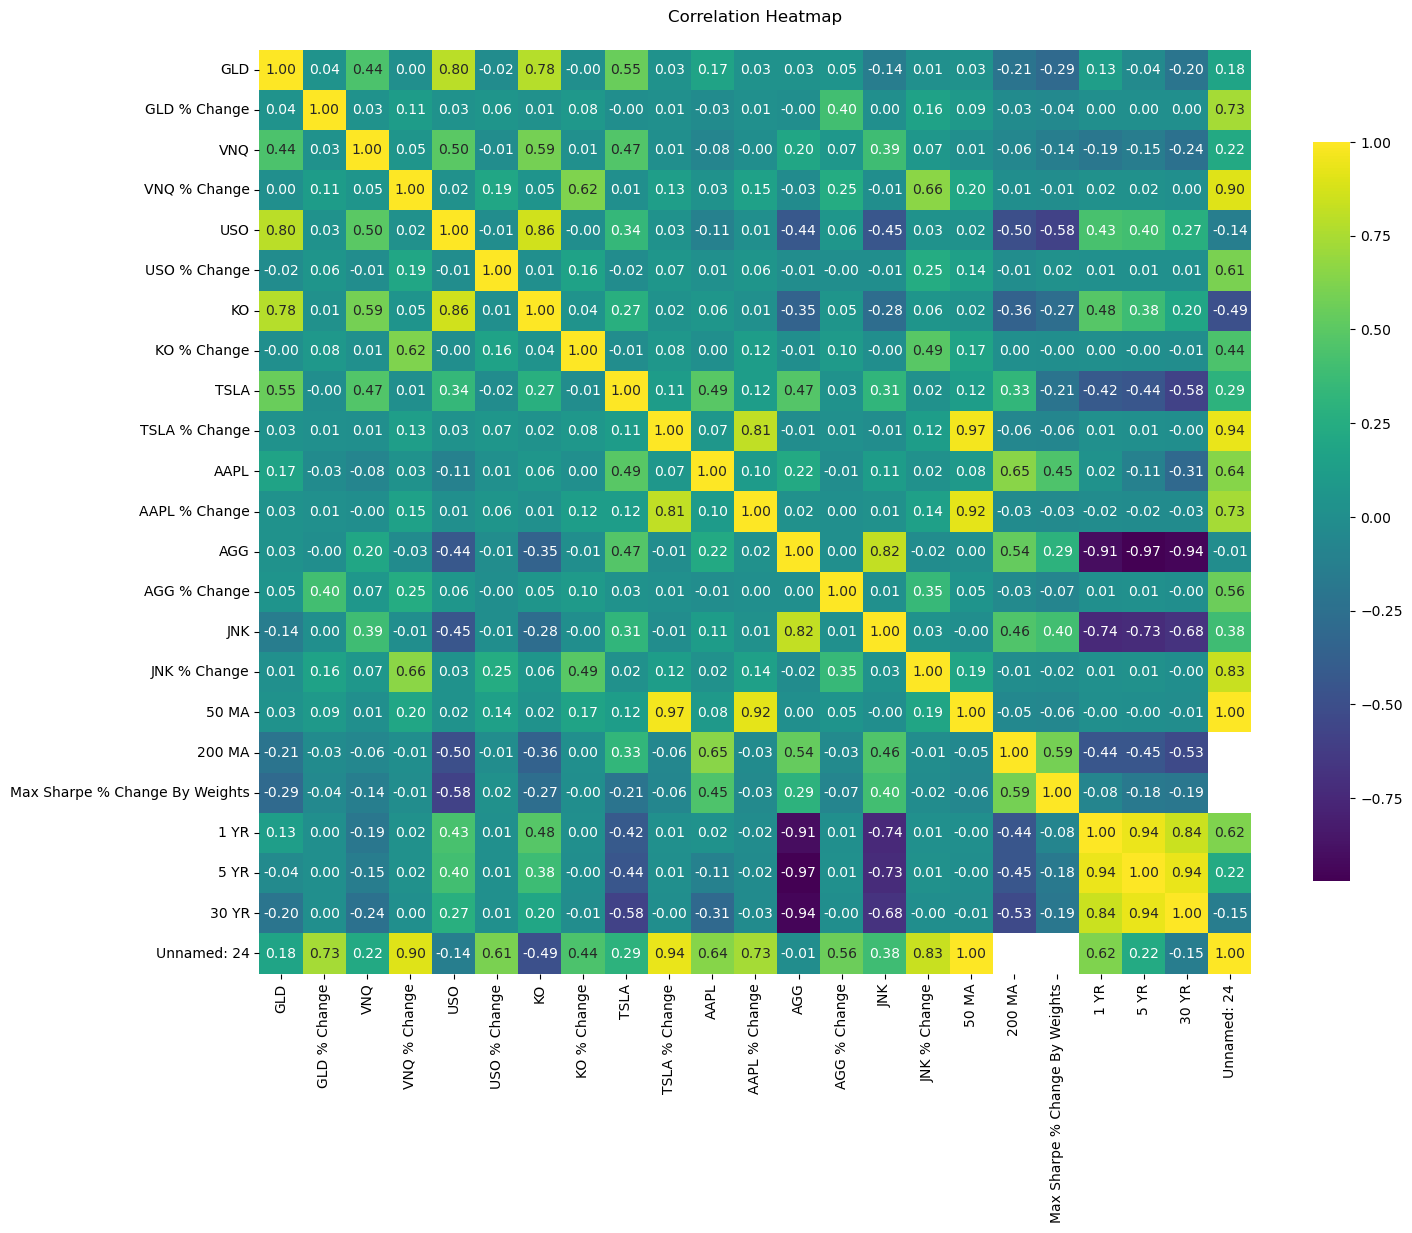

In [8]:
# Exclude the 'signal' column from the DataFrame
corr_matrix = AAPL_data_df.drop(columns=['Signal']).corr()

# Adjust the figure size
plt.figure(figsize=(16, 12))

# Increase the spacing between cells using cbar_kws
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Add more space between the heatmap and the title
plt.title('Correlation Heatmap', pad=20)

# Save the plot as an image
plt.savefig('correlation_heatmap_max.png')

# Show the plot
plt.show()

In [9]:
""" DISTRIBUTION OF KEY VARIABLES 

By examining the distribution of key variables' closing prices, we gain insights into their behavior.
This information is crucial for understanding market trends, volatility, and potential investment opportunities.

Key Takeaways: 
* GLD: The distribution of GLD closing prices appears symmetric, with most prices centered around a particular value.
* VNQ: VNQ's distribution is slightly skewed, suggesting some variations in its closing prices.
* USO: USO's distribution shows a narrow spread, indicating relatively stable closing prices.
* TSLA: TSLA's distribution has a wide spread, indicating greater volatility in its closing prices.
* AAPL: AAPL's distribution resembles a bell curve, which is common in well-behaved datasets.
* AGG: AGG's distribution appears symmetric, suggesting a consistent range of closing prices.
* JNK: JNK's distribution exhibits a single peak, showing a dominant range of closing prices.

"""

" DISTRIBUTION OF KEY VARIABLES \n\nBy examining the distribution of key variables' closing prices, we gain insights into their behavior.\nThis information is crucial for understanding market trends, volatility, and potential investment opportunities.\n\nKey Takeaways: \n* GLD: The distribution of GLD closing prices appears symmetric, with most prices centered around a particular value.\n* VNQ: VNQ's distribution is slightly skewed, suggesting some variations in its closing prices.\n* USO: USO's distribution shows a narrow spread, indicating relatively stable closing prices.\n* TSLA: TSLA's distribution has a wide spread, indicating greater volatility in its closing prices.\n* AAPL: AAPL's distribution resembles a bell curve, which is common in well-behaved datasets.\n* AGG: AGG's distribution appears symmetric, suggesting a consistent range of closing prices.\n* JNK: JNK's distribution exhibits a single peak, showing a dominant range of closing prices.\n\n"

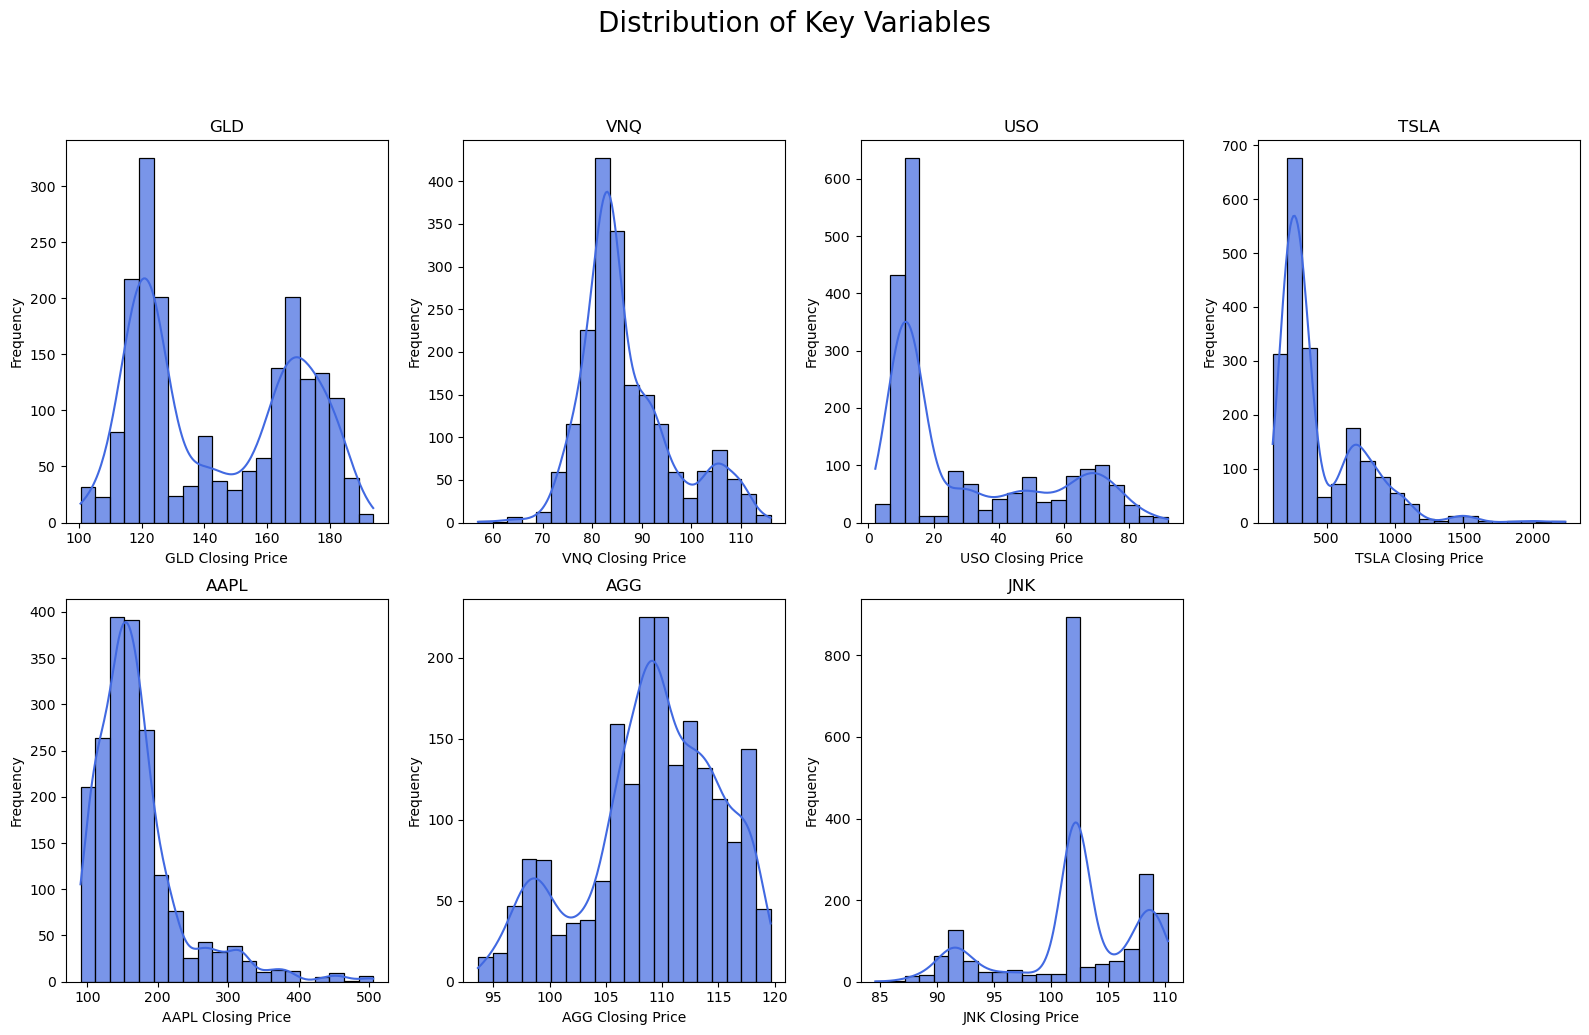

In [10]:
# Define the key variables
key_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Calculate the number of rows and columns for subplots
n_cols = 4
n_rows = -(-len(key_vars) // n_cols)  # Ceiling division to calculate rows

# Create the histogram subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
fig.suptitle('Distribution of Key Variables', fontsize=20, y=1.03)

# Plot histograms for each variable with royal blue color and modified x-axis labels
for i, var in enumerate(key_vars):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(df[var], bins=20, ax=ax, color='#4169E1', alpha=0.7, kde=True)  # Royal blue color
    ax.set_title(var)
    ax.set_xlabel(f'{var} Closing Price')
    ax.set_ylabel('Frequency')

# Remove empty subplots if needed
if len(key_vars) < n_rows * n_cols:
    for i in range(len(key_vars), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save the plots as an image
plt.savefig('key_variables_histograms_max.png')

# Show the plots
plt.show()

In [11]:
"""
TIME SERIES PLOT

Exploring Trends Over Time:

Understanding Price Movements: Time series plots show how the prices of key variables (GLD, VNQ, USO, TSLA, AAPL, AGG, JNK) change over
the given time period (as indicated by the "Date" on the x-axis).
Identifying Trends: By observing the trajectory of the lines, you can identify trends such as upward or downward movement, 
stability, or periods of volatility.
Detecting Seasonality:

Recurring Patterns: Time series plots can reveal recurring patterns or seasonality in the data.
These patterns may correspond to certain times of the year or economic cycles.
Identifying Anomalies and Outliers:

Unusual Movements: Sudden spikes or drops in the plot can indicate anomalies or outliers. 
These may be caused by significant events affecting the market.
Understanding Volatility:

Fluctuations: The degree of movement in the plot indicates the volatility of the variable's price.
Wide fluctuations suggest higher volatility, while steadier movements suggest stability.
Impact of External Factors:

News and Events: Time series plots can show how external events, such as economic announcements or major news,
impact the prices of the key variables.
Long-term and Short-term Analysis:

Observing Long-term Trends: By analyzing the entire time range, you can spot long-term trends, enabling you to make 
informed investment decisions.
Zooming into Short-term Movements: You can also zoom into shorter time periods to analyze short-term movements and make tactical decisions.

"""

'\nTIME SERIES PLOT\n\nExploring Trends Over Time:\n\nUnderstanding Price Movements: Time series plots show how the prices of key variables (GLD, VNQ, USO, TSLA, AAPL, AGG, JNK) change over\nthe given time period (as indicated by the "Date" on the x-axis).\nIdentifying Trends: By observing the trajectory of the lines, you can identify trends such as upward or downward movement, \nstability, or periods of volatility.\nDetecting Seasonality:\n\nRecurring Patterns: Time series plots can reveal recurring patterns or seasonality in the data.\nThese patterns may correspond to certain times of the year or economic cycles.\nIdentifying Anomalies and Outliers:\n\nUnusual Movements: Sudden spikes or drops in the plot can indicate anomalies or outliers. \nThese may be caused by significant events affecting the market.\nUnderstanding Volatility:\n\nFluctuations: The degree of movement in the plot indicates the volatility of the variable\'s price.\nWide fluctuations suggest higher volatility, while

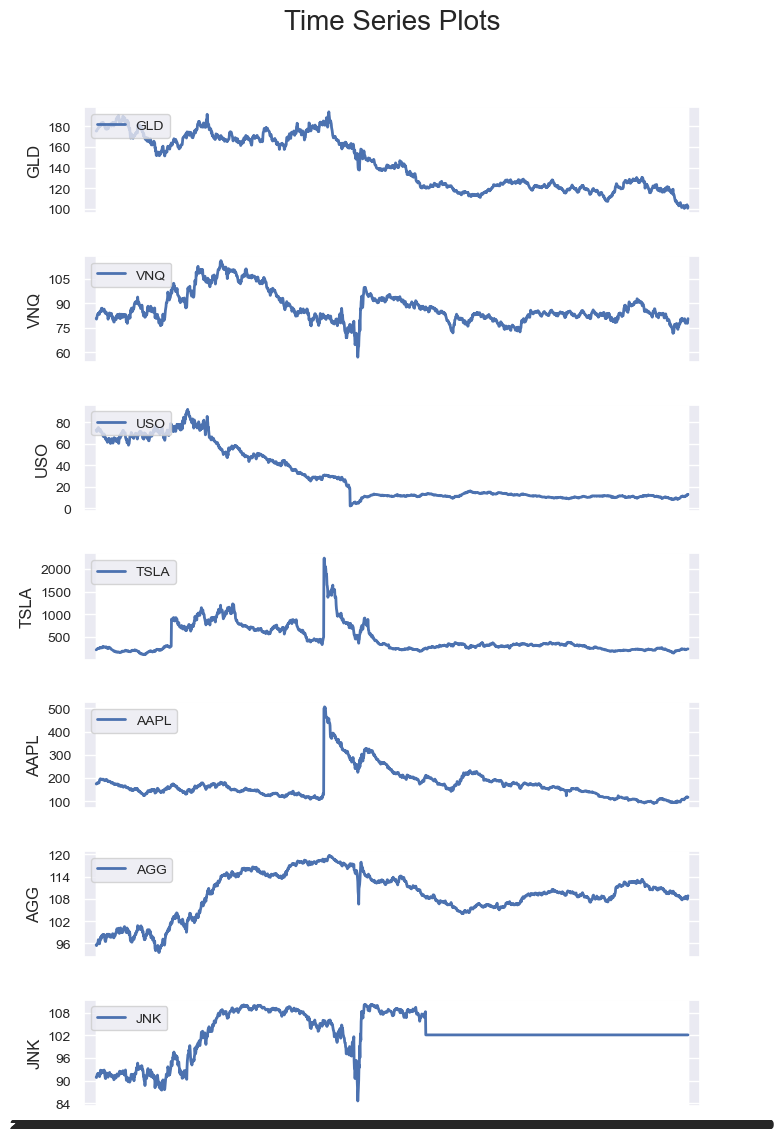

In [12]:
# Define the time variables
time_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Set the style using Seaborn
sns.set(style="darkgrid")

# Create the time series subplots
fig, axes = plt.subplots(nrows=len(time_vars), ncols=1, figsize=(8, 12), sharex=True)
fig.suptitle('Time Series Plots', fontsize=20)

# Plot time series for each variable with enhanced style
for i, var in enumerate(time_vars):
    ax = axes[i]
    sns.lineplot(data=df, y=var, x='Date', ax=ax, linewidth=2)
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='both', labelsize=10)
    ax.legend(labels=[var], loc='upper left', fontsize=10)
    ax.margins(x=0.02)  # Add a small margin to the x-axis
    
    # Format y-axis ticks with proper spacing
    if i == 0:
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=6, integer=True))  # Adjust number of ticks
    else:
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5, integer=True))  # Adjust number of ticks

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space at the top for the title
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between subplots

# Save the plots as an image
plt.savefig('time_series_plots_max.png')

# Show the plots
plt.show()

In [13]:
"""
PAIRPLOT OF SELECTED VARIABLES

Pairplot for Exploratory Data Analysis (EDA):

Visual Exploration: Pairplot displays scatter plots for selected variables, 
providing a quick visual exploration of relationships and trends between pairs of variables.

Correlation Insight: It helps identify positive/negative correlations between variables.
Correlated variables can impact model performance and guide feature selection.

Pattern Recognition: Scatter plots reveal patterns like clusters, trends, and outliers,
aiding in understanding data behavior and potential anomalies.

Distribution Insight: Histograms on the diagonal show variable distributions, 
offering a snapshot of their characteristics.

Decision Support: Pairplots assist in selecting variables for modeling by highlighting informative relationships.

Non-Technical Communication: The visual nature of pairplots makes them effective for
communicating insights to non-technical stakeholders.

Preprocessing Hints: Nonlinear relationships and skewed distributions might prompt data transformation or preprocessing.

Limitation Awareness: Detecting multicollinearity, where variables are highly correlated, is vital as it can impact model interpretation.

"""

'\nPAIRPLOT OF SELECTED VARIABLES\n\nPairplot for Exploratory Data Analysis (EDA):\n\nVisual Exploration: Pairplot displays scatter plots for selected variables, \nproviding a quick visual exploration of relationships and trends between pairs of variables.\n\nCorrelation Insight: It helps identify positive/negative correlations between variables.\nCorrelated variables can impact model performance and guide feature selection.\n\nPattern Recognition: Scatter plots reveal patterns like clusters, trends, and outliers,\naiding in understanding data behavior and potential anomalies.\n\nDistribution Insight: Histograms on the diagonal show variable distributions, \noffering a snapshot of their characteristics.\n\nDecision Support: Pairplots assist in selecting variables for modeling by highlighting informative relationships.\n\nNon-Technical Communication: The visual nature of pairplots makes them effective for\ncommunicating insights to non-technical stakeholders.\n\nPreprocessing Hints: Non

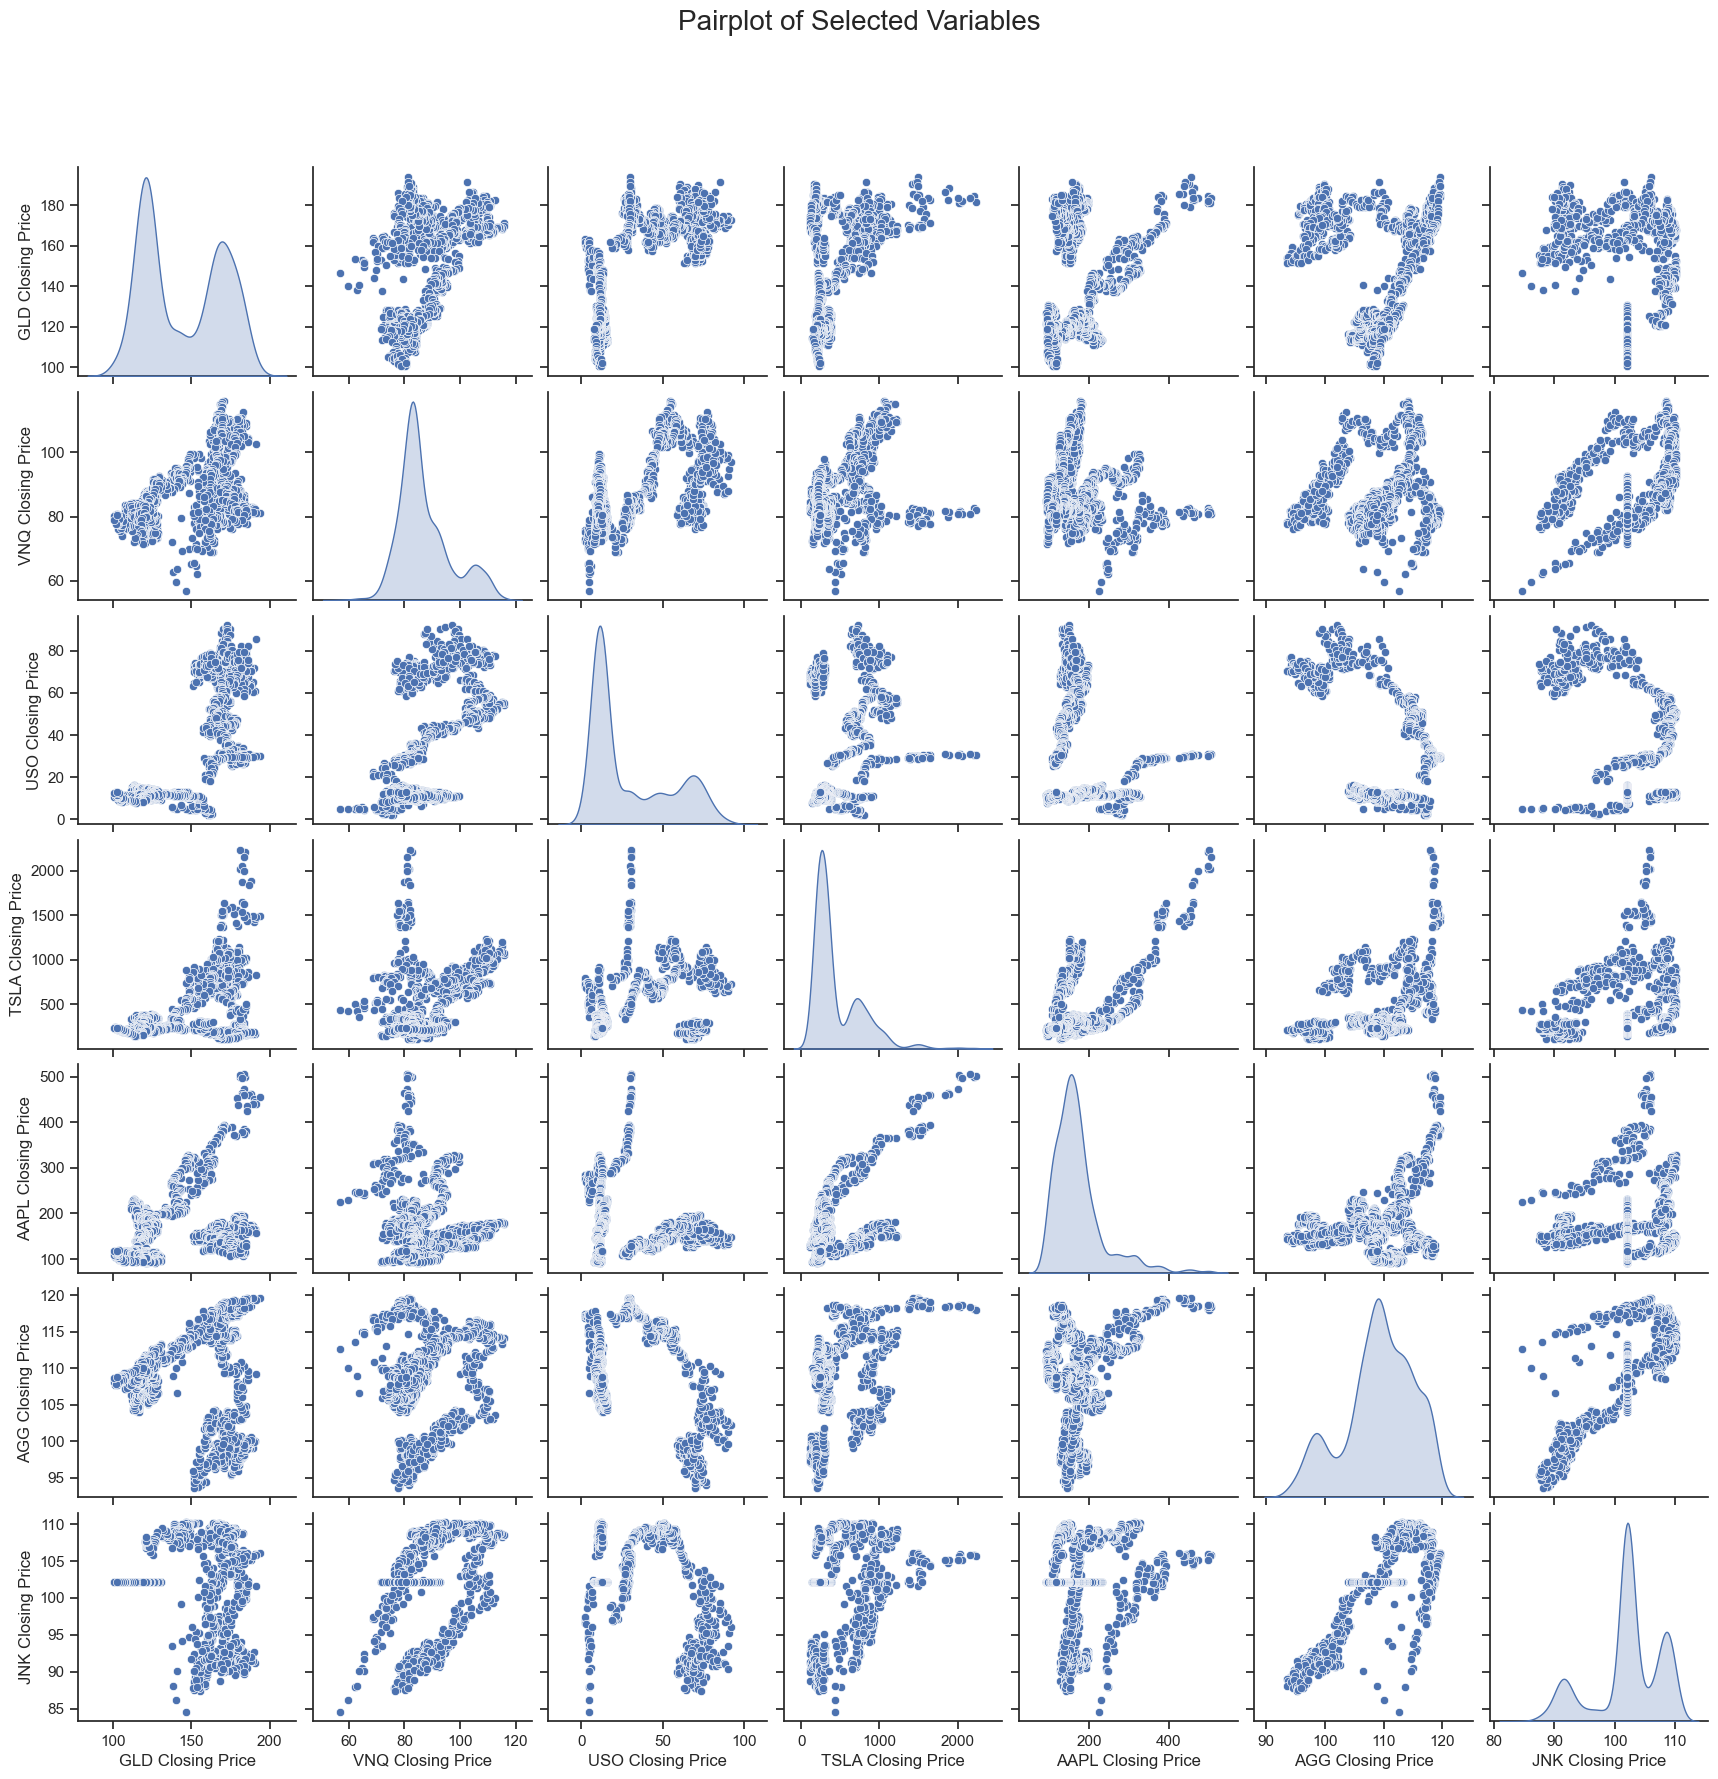

In [14]:
# Define the selected variables
selected_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Set the style using Seaborn
sns.set(style="ticks")

# Create the pairplot with the 'viridis' colormap
pairplot = sns.pairplot(df[selected_vars], diag_kind="kde", kind="scatter", palette="viridis")

# Add "Closing Price" to the axes labels
for i, var in enumerate(selected_vars):
    pairplot.axes[i, 0].set_ylabel(f'{var} Closing Price')
    pairplot.axes[-1, i].set_xlabel(f'{var} Closing Price')

# Add a title and adjust layout
plt.suptitle('Pairplot of Selected Variables', y=1.02, fontsize=20)
pairplot.fig.subplots_adjust(top=0.93)

# Save the pairplot as an image
pairplot.savefig('pairplot_selected_variables_max.png')

# Show the plot
plt.show()

In [15]:
""" DATASET 2: MIN_RATING """

' DATASET 2: MIN_RATING '

In [16]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
AAPL_data_df = df = pd.read_csv("min_rating.csv")


# Review the DataFrame
AAPL_data_df

,Date,GLD,GLD % Change,VNQ,VNQ % Change,USO,USO % Change,KO,KO % Change,TSLA,...,AGG % Change,JNK,JNK % Change,50 MA,200 MA,Min Vol % Change By Weights,1 YR,5 YR,30 YR,Signal
0,2023-08-18 04:00:00+00:00,175.33,-0.000237,80.44,0.000087,72.79,0.000105,60.95,-0.000109,215.49,...,0.000072,90.840000,0.000104,0.000000,1.152515,1.159432,5.350000,4.380000,4.380000,0
1,2023-08-17 04:00:00+00:00,175.30,-0.000171,80.19,-0.003108,71.98,-0.011128,60.61,-0.005578,219.22,...,-0.002196,90.800000,-0.000440,-0.001275,1.152515,1.159432,5.360000,4.420000,4.410000,0
2,2023-08-16 04:00:00+00:00,175.57,0.001540,80.84,0.008106,71.37,-0.008475,60.48,-0.002145,225.60,...,0.001048,91.230000,0.004736,0.002630,1.152515,1.159432,5.370000,4.420000,4.380000,1
3,2023-08-15 04:00:00+00:00,176.59,0.005810,81.85,0.012494,72.62,0.017514,60.47,-0.000165,232.96,...,0.002408,91.470000,0.002631,0.004056,1.152515,1.159432,5.360000,4.360000,4.320000,1
4,2023-08-14 04:00:00+00:00,177.06,0.002662,82.78,0.011362,73.81,0.016387,60.88,0.006780,239.76,...,0.002716,91.760000,0.003170,0.004881,1.152515,1.159432,5.370000,4.360000,4.290000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,2015-12-07 05:00:00+00:00,102.67,-0.001653,78.87,0.000888,11.72,0.003425,43.20,0.004418,231.13,...,-0.000369,102.128524,0.000000,0.001218,1.089914,1.131945,1.639022,1.929995,2.665611,1
1938,2015-12-04 05:00:00+00:00,104.02,0.013149,79.09,0.002789,12.46,0.063140,43.29,0.002083,230.38,...,-0.001476,102.128524,0.000000,0.002992,1.089556,1.131712,1.639022,1.929995,2.665611,1
1939,2015-12-03 05:00:00+00:00,101.76,-0.021727,77.61,-0.018713,12.77,0.024880,42.46,-0.019173,232.71,...,-0.003234,102.128524,0.000000,-0.009982,1.089117,1.131453,1.639022,1.929995,2.665611,0
1940,2015-12-02 05:00:00+00:00,100.69,-0.010515,78.85,0.015977,12.48,-0.022709,42.77,0.007301,231.99,...,0.007369,102.128524,0.000000,0.001392,1.088829,1.131209,1.639022,1.929995,2.665611,1


In [17]:
""" CORRELATION HEATMAP 

In the context of your machine learning model,
this heatmap helps you identify potential multicollinearity
between independent variables, which might affect the model's performance 
or interpretation. If two independent variables are highly correlated,
it could mean they provide similar information to the model,
and you might consider removing one to avoid redundancy.

 It doesn't directly indicate the relationship between the independent variables and the excluded "Signal" variable,
 since the heatmap only considers pairwise relationships between the independent variables.

"""

' CORRELATION HEATMAP \n\nIn the context of your machine learning model,\nthis heatmap helps you identify potential multicollinearity\nbetween independent variables, which might affect the model\'s performance \nor interpretation. If two independent variables are highly correlated,\nit could mean they provide similar information to the model,\nand you might consider removing one to avoid redundancy.\n\n It doesn\'t directly indicate the relationship between the independent variables and the excluded "Signal" variable,\n since the heatmap only considers pairwise relationships between the independent variables.\n\n'

In [18]:
""" HOW TO INTERPRET THE HEATMAP 

Color Intensity: The cell color intensity shows correlation strength.
Dark blue: strong negative correlation, dark red: strong positive correlation.

Correlation Values: Numbers (-1 to 1) in cells indicate correlations. 
Positive: one variable up, other likely up; Negative: one up, other down; Close to 0: weak correlation.

Diagonal Line: Diagonal cells show correlation of each variable with itself (always 1, perfect positive correlation).

Interpretation: Dark cells suggest strong relationships. Dark blue: one up, other down; Dark red: both tend to go up.

Weak/None: Light cells show weak or no correlation.

"""

' HOW TO INTERPRET THE HEATMAP \n\nColor Intensity: The cell color intensity shows correlation strength.\nDark blue: strong negative correlation, dark red: strong positive correlation.\n\nCorrelation Values: Numbers (-1 to 1) in cells indicate correlations. \nPositive: one variable up, other likely up; Negative: one up, other down; Close to 0: weak correlation.\n\nDiagonal Line: Diagonal cells show correlation of each variable with itself (always 1, perfect positive correlation).\n\nInterpretation: Dark cells suggest strong relationships. Dark blue: one up, other down; Dark red: both tend to go up.\n\nWeak/None: Light cells show weak or no correlation.\n\n'

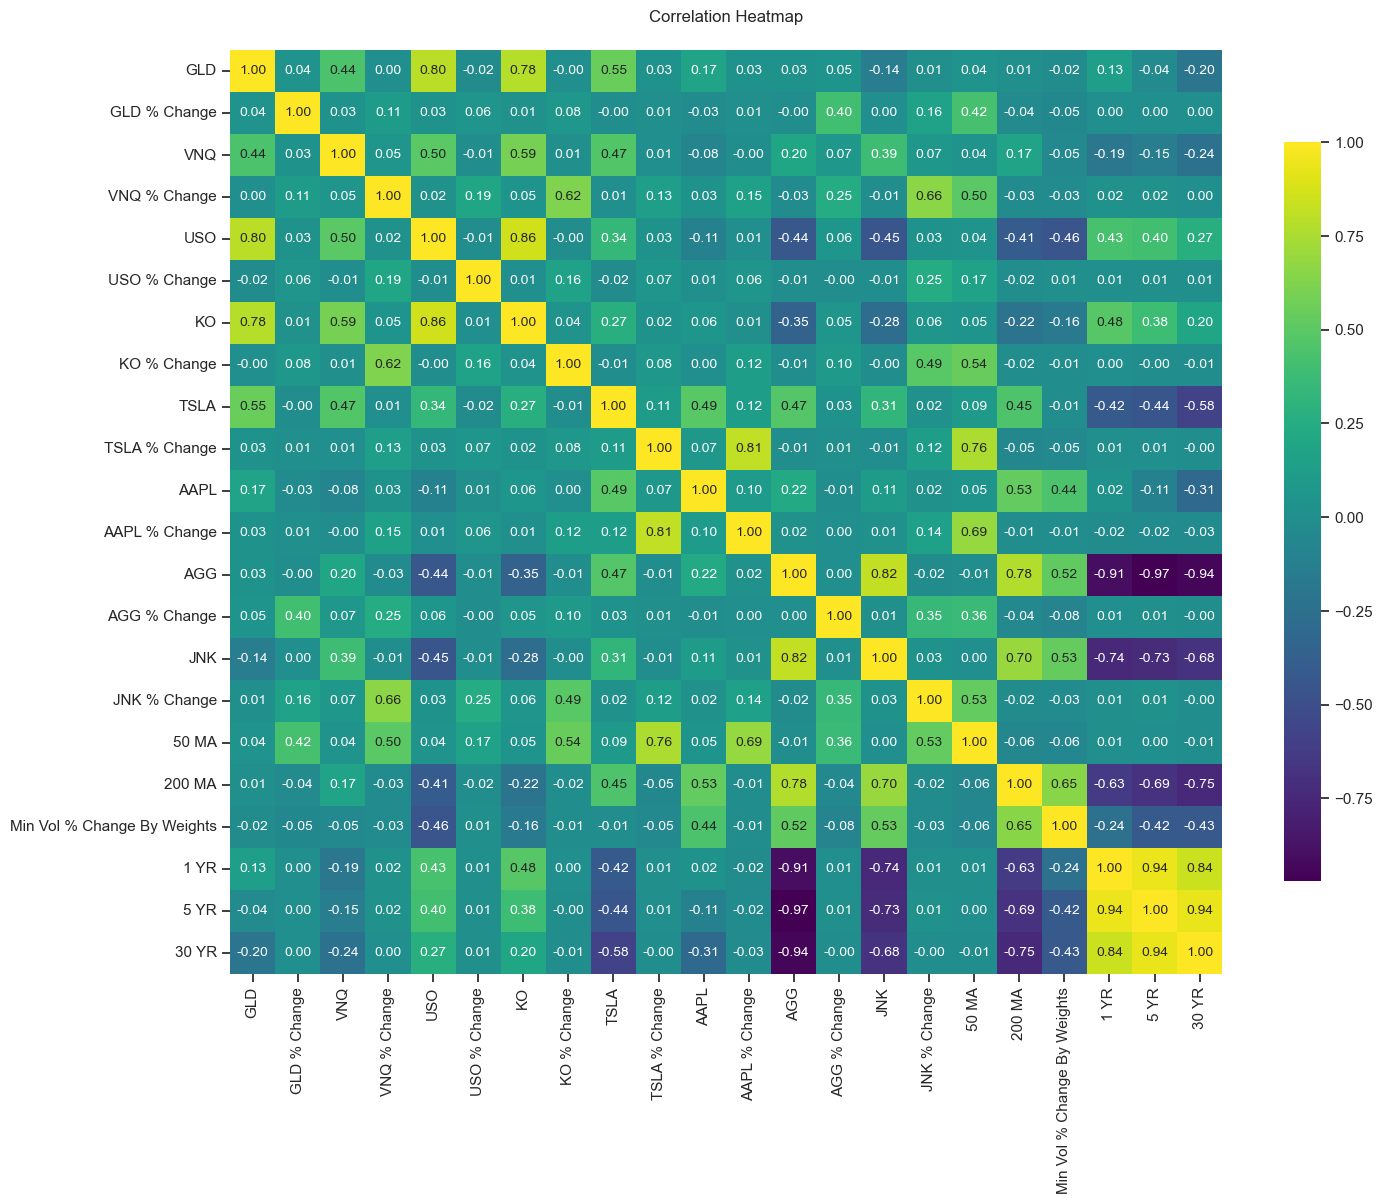

In [19]:
# Exclude the 'signal' column from the DataFrame
corr_matrix = AAPL_data_df.drop(columns=['Signal']).corr()

# Adjust the figure size
plt.figure(figsize=(16, 12))

# Increase the spacing between cells using cbar_kws
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Add more space between the heatmap and the title
plt.title('Correlation Heatmap', pad=20)

# Save the plot as an image
plt.savefig('correlation_heatmap_min.png')

# Show the plot
plt.show()

In [20]:
""" DISTRIBUTION OF KEY VARIABLES 

By examining the distribution of key variables' closing prices, we gain insights into their behavior.
This information is crucial for understanding market trends, volatility, and potential investment opportunities.

Key Takeaways: 
* GLD: The distribution of GLD closing prices appears symmetric, with most prices centered around a particular value.
* VNQ: VNQ's distribution is slightly skewed, suggesting some variations in its closing prices.
* USO: USO's distribution shows a narrow spread, indicating relatively stable closing prices.
* TSLA: TSLA's distribution has a wide spread, indicating greater volatility in its closing prices.
* AAPL: AAPL's distribution resembles a bell curve, which is common in well-behaved datasets.
* AGG: AGG's distribution appears symmetric, suggesting a consistent range of closing prices.
* JNK: JNK's distribution exhibits a single peak, showing a dominant range of closing prices.

"""

" DISTRIBUTION OF KEY VARIABLES \n\nBy examining the distribution of key variables' closing prices, we gain insights into their behavior.\nThis information is crucial for understanding market trends, volatility, and potential investment opportunities.\n\nKey Takeaways: \n* GLD: The distribution of GLD closing prices appears symmetric, with most prices centered around a particular value.\n* VNQ: VNQ's distribution is slightly skewed, suggesting some variations in its closing prices.\n* USO: USO's distribution shows a narrow spread, indicating relatively stable closing prices.\n* TSLA: TSLA's distribution has a wide spread, indicating greater volatility in its closing prices.\n* AAPL: AAPL's distribution resembles a bell curve, which is common in well-behaved datasets.\n* AGG: AGG's distribution appears symmetric, suggesting a consistent range of closing prices.\n* JNK: JNK's distribution exhibits a single peak, showing a dominant range of closing prices.\n\n"

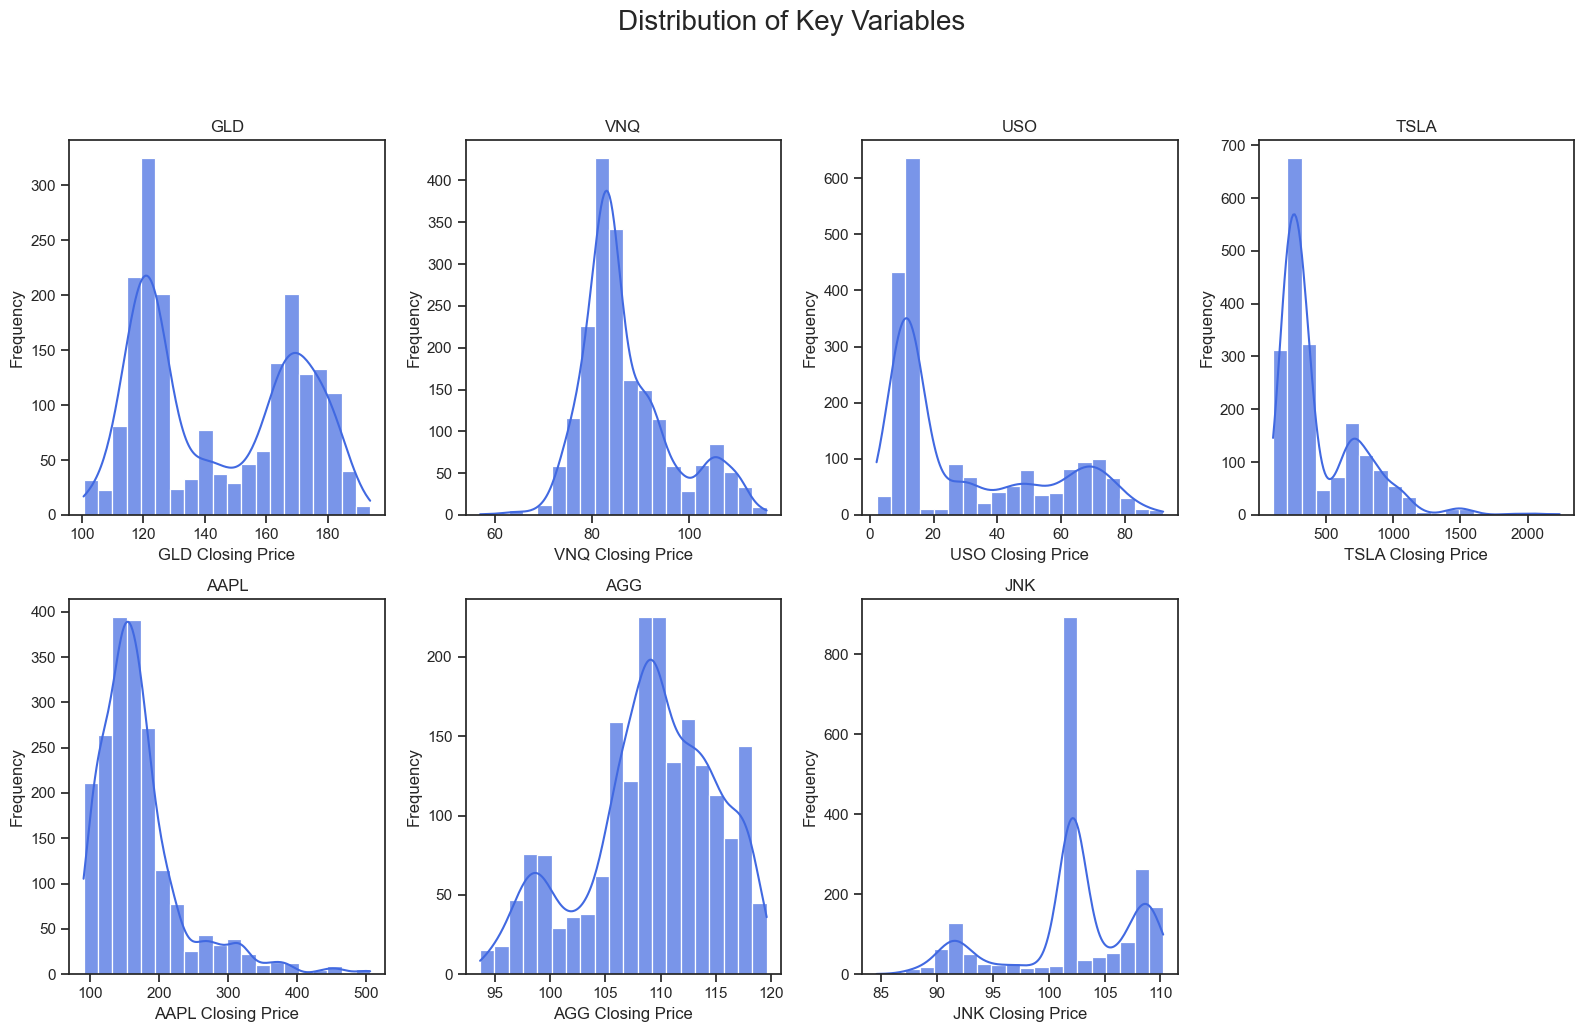

In [21]:
# Define the key variables
key_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Calculate the number of rows and columns for subplots
n_cols = 4
n_rows = -(-len(key_vars) // n_cols)  # Ceiling division to calculate rows

# Create the histogram subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
fig.suptitle('Distribution of Key Variables', fontsize=20, y=1.03)

# Plot histograms for each variable with royal blue color and modified x-axis labels
for i, var in enumerate(key_vars):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(df[var], bins=20, ax=ax, color='#4169E1', alpha=0.7, kde=True)  # Royal blue color
    ax.set_title(var)
    ax.set_xlabel(f'{var} Closing Price')
    ax.set_ylabel('Frequency')

# Remove empty subplots if needed
if len(key_vars) < n_rows * n_cols:
    for i in range(len(key_vars), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save the plots as an image
plt.savefig('key_variables_histograms_min.png')

# Show the plots
plt.show()

In [22]:
"""
TIME SERIES PLOT

Exploring Trends Over Time:

Understanding Price Movements: Time series plots show how the prices of key variables (GLD, VNQ, USO, TSLA, AAPL, AGG, JNK) change over
the given time period (as indicated by the "Date" on the x-axis).
Identifying Trends: By observing the trajectory of the lines, you can identify trends such as upward or downward movement, 
stability, or periods of volatility.
Detecting Seasonality:

Recurring Patterns: Time series plots can reveal recurring patterns or seasonality in the data.
These patterns may correspond to certain times of the year or economic cycles.
Identifying Anomalies and Outliers:

Unusual Movements: Sudden spikes or drops in the plot can indicate anomalies or outliers. 
These may be caused by significant events affecting the market.
Understanding Volatility:

Fluctuations: The degree of movement in the plot indicates the volatility of the variable's price.
Wide fluctuations suggest higher volatility, while steadier movements suggest stability.
Impact of External Factors:

News and Events: Time series plots can show how external events, such as economic announcements or major news,
impact the prices of the key variables.
Long-term and Short-term Analysis:

Observing Long-term Trends: By analyzing the entire time range, you can spot long-term trends, enabling you to make 
informed investment decisions.
Zooming into Short-term Movements: You can also zoom into shorter time periods to analyze short-term movements and make tactical decisions.

"""

'\nTIME SERIES PLOT\n\nExploring Trends Over Time:\n\nUnderstanding Price Movements: Time series plots show how the prices of key variables (GLD, VNQ, USO, TSLA, AAPL, AGG, JNK) change over\nthe given time period (as indicated by the "Date" on the x-axis).\nIdentifying Trends: By observing the trajectory of the lines, you can identify trends such as upward or downward movement, \nstability, or periods of volatility.\nDetecting Seasonality:\n\nRecurring Patterns: Time series plots can reveal recurring patterns or seasonality in the data.\nThese patterns may correspond to certain times of the year or economic cycles.\nIdentifying Anomalies and Outliers:\n\nUnusual Movements: Sudden spikes or drops in the plot can indicate anomalies or outliers. \nThese may be caused by significant events affecting the market.\nUnderstanding Volatility:\n\nFluctuations: The degree of movement in the plot indicates the volatility of the variable\'s price.\nWide fluctuations suggest higher volatility, while

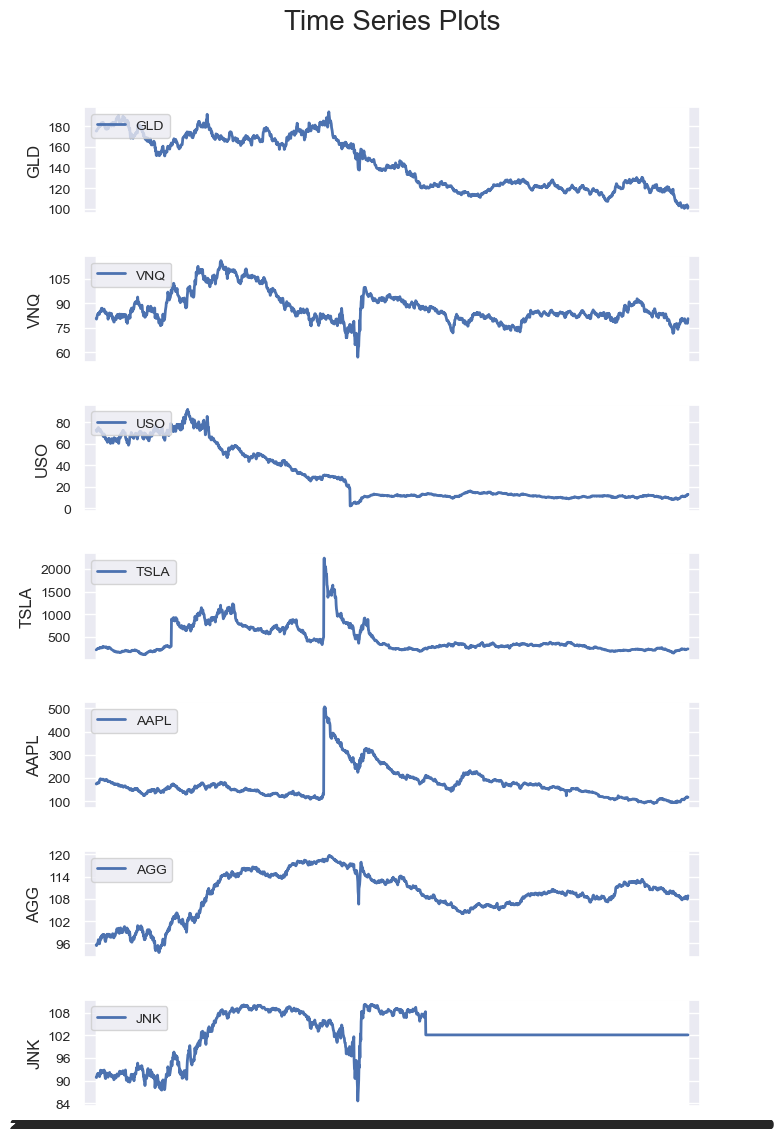

In [23]:
# Define the time variables
time_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Set the style using Seaborn
sns.set(style="darkgrid")

# Create the time series subplots
fig, axes = plt.subplots(nrows=len(time_vars), ncols=1, figsize=(8, 12), sharex=True)
fig.suptitle('Time Series Plots', fontsize=20)

# Plot time series for each variable with enhanced style
for i, var in enumerate(time_vars):
    ax = axes[i]
    sns.lineplot(data=df, y=var, x='Date', ax=ax, linewidth=2)
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='both', labelsize=10)
    ax.legend(labels=[var], loc='upper left', fontsize=10)
    ax.margins(x=0.02)  # Add a small margin to the x-axis
    
    # Format y-axis ticks with proper spacing
    if i == 0:
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=6, integer=True))  # Adjust number of ticks
    else:
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5, integer=True))  # Adjust number of ticks

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space at the top for the title
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between subplots

# Save the plots as an image
plt.savefig('time_series_plots_min.png')

# Show the plots
plt.show()

In [24]:
"""
PAIRPLOT OF SELECTED VARIABLES

Pairplot for Exploratory Data Analysis (EDA):

Visual Exploration: Pairplot displays scatter plots for selected variables, 
providing a quick visual exploration of relationships and trends between pairs of variables.

Correlation Insight: It helps identify positive/negative correlations between variables.
Correlated variables can impact model performance and guide feature selection.

Pattern Recognition: Scatter plots reveal patterns like clusters, trends, and outliers,
aiding in understanding data behavior and potential anomalies.

Distribution Insight: Histograms on the diagonal show variable distributions, 
offering a snapshot of their characteristics.

Decision Support: Pairplots assist in selecting variables for modeling by highlighting informative relationships.

Non-Technical Communication: The visual nature of pairplots makes them effective for
communicating insights to non-technical stakeholders.

Preprocessing Hints: Nonlinear relationships and skewed distributions might prompt data transformation or preprocessing.

Limitation Awareness: Detecting multicollinearity, where variables are highly correlated, is vital as it can impact model interpretation.

"""

'\nPAIRPLOT OF SELECTED VARIABLES\n\nPairplot for Exploratory Data Analysis (EDA):\n\nVisual Exploration: Pairplot displays scatter plots for selected variables, \nproviding a quick visual exploration of relationships and trends between pairs of variables.\n\nCorrelation Insight: It helps identify positive/negative correlations between variables.\nCorrelated variables can impact model performance and guide feature selection.\n\nPattern Recognition: Scatter plots reveal patterns like clusters, trends, and outliers,\naiding in understanding data behavior and potential anomalies.\n\nDistribution Insight: Histograms on the diagonal show variable distributions, \noffering a snapshot of their characteristics.\n\nDecision Support: Pairplots assist in selecting variables for modeling by highlighting informative relationships.\n\nNon-Technical Communication: The visual nature of pairplots makes them effective for\ncommunicating insights to non-technical stakeholders.\n\nPreprocessing Hints: Non

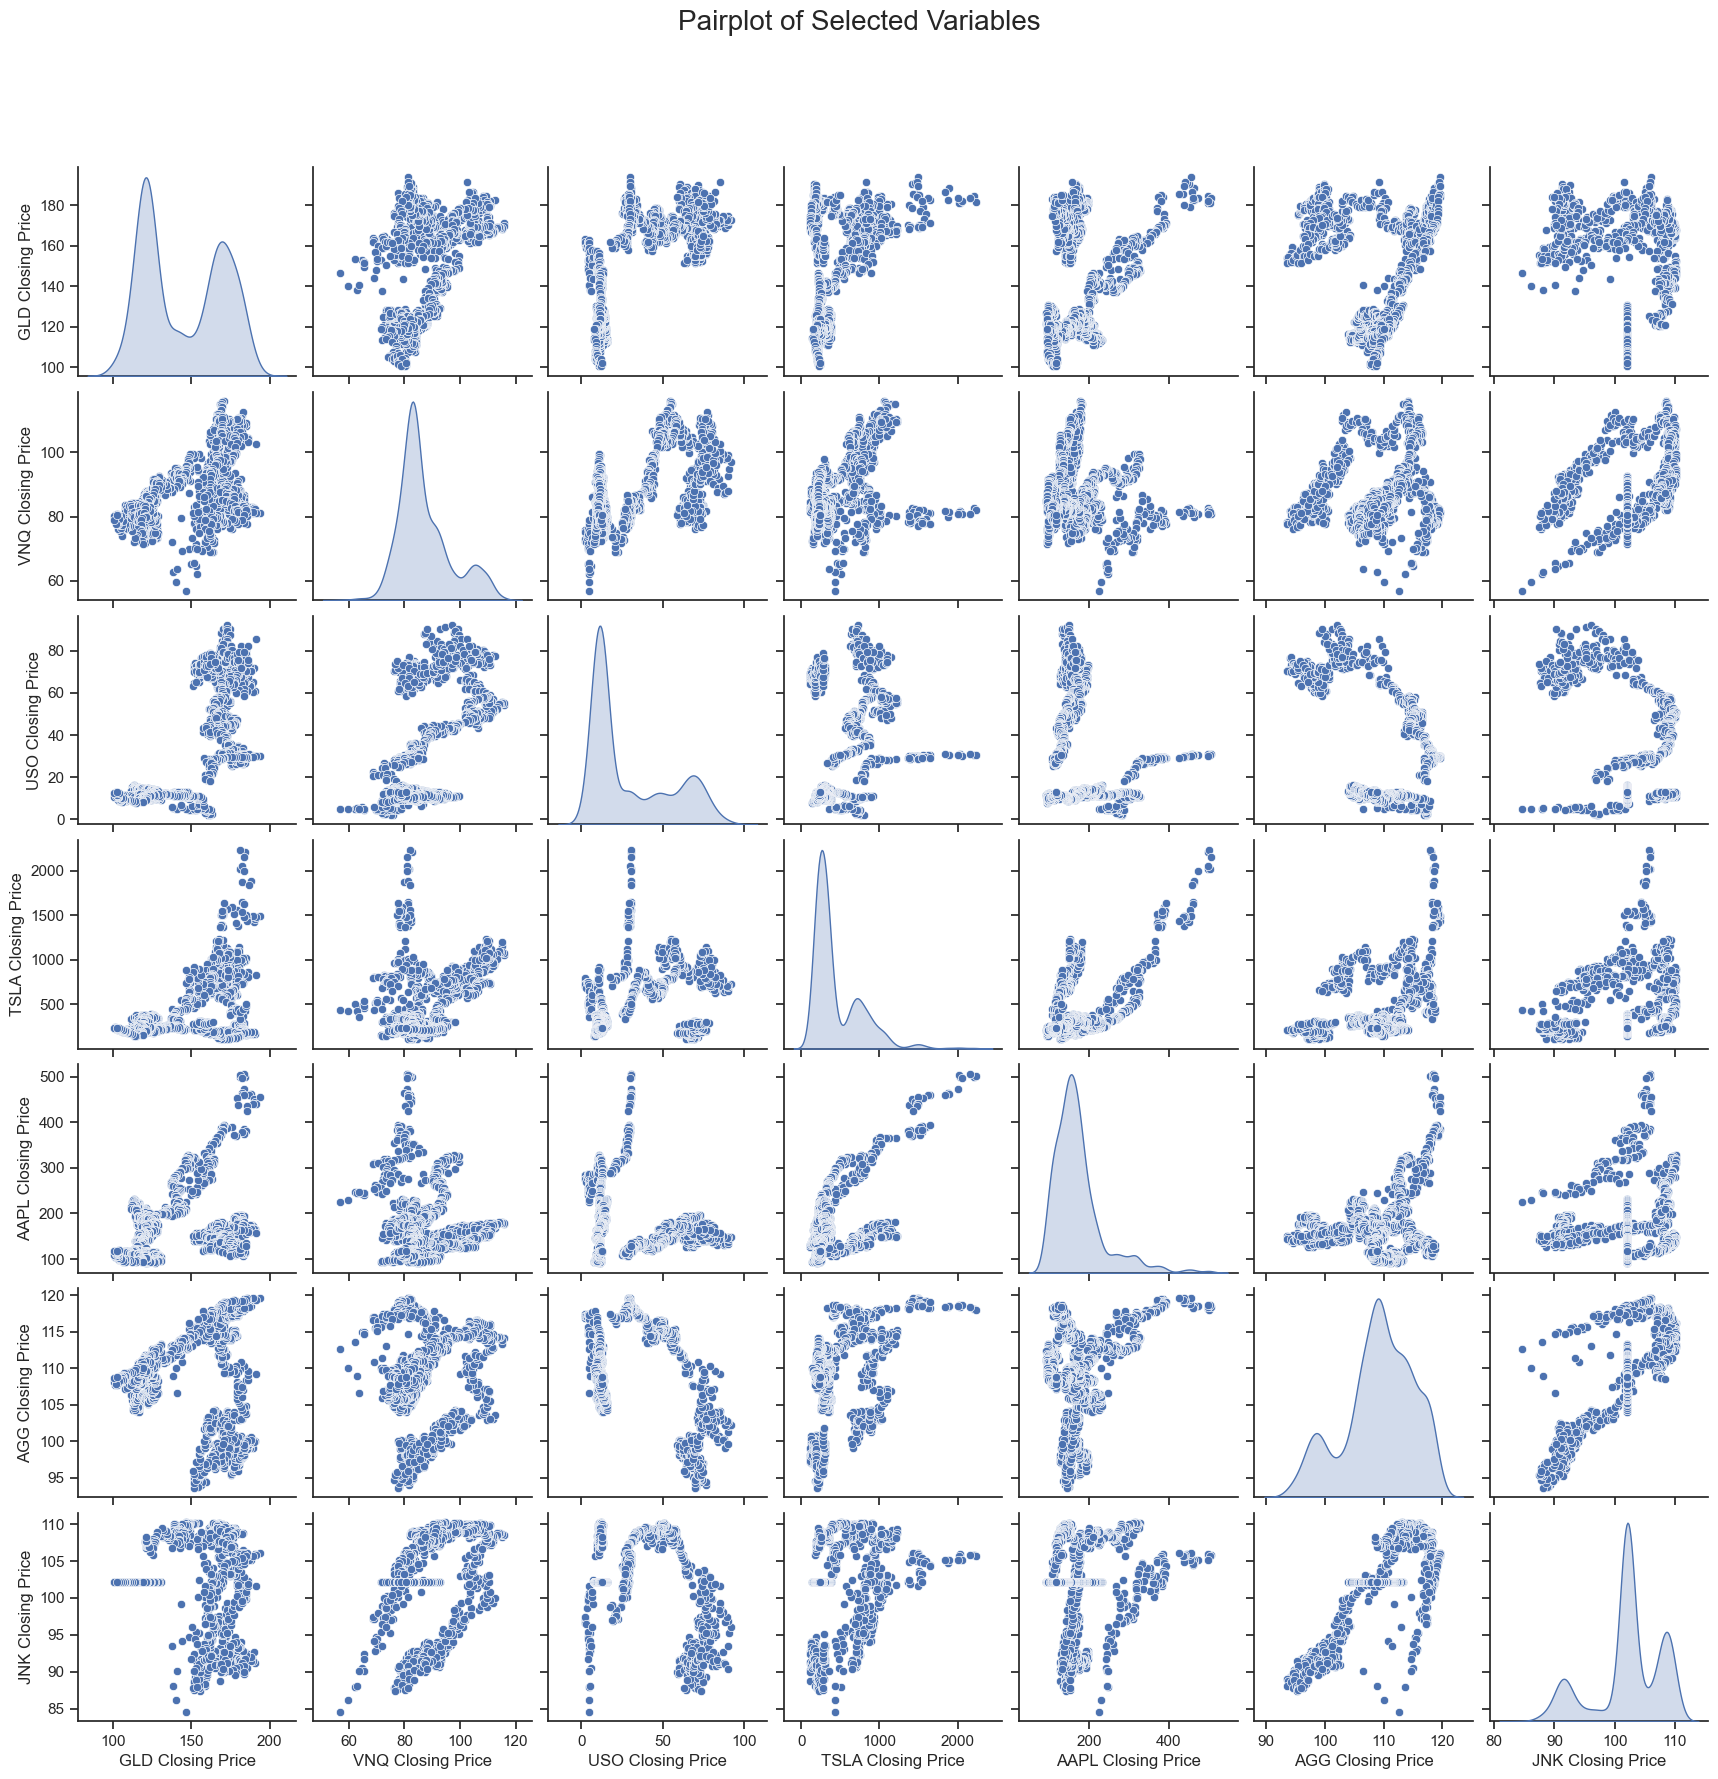

In [25]:
# Define the selected variables
selected_vars = ['GLD', 'VNQ', 'USO', 'TSLA', 'AAPL', 'AGG', 'JNK']

# Set the style using Seaborn
sns.set(style="ticks")

# Create the pairplot with the 'viridis' colormap
pairplot = sns.pairplot(df[selected_vars], diag_kind="kde", kind="scatter", palette="viridis")

# Add "Closing Price" to the axes labels
for i, var in enumerate(selected_vars):
    pairplot.axes[i, 0].set_ylabel(f'{var} Closing Price')
    pairplot.axes[-1, i].set_xlabel(f'{var} Closing Price')

# Add a title and adjust layout
plt.suptitle('Pairplot of Selected Variables', y=1.02, fontsize=20)
pairplot.fig.subplots_adjust(top=0.93)

# Save the pairplot as an image
pairplot.savefig('pairplot_selected_variables_min.png')

# Show the plot
plt.show()

In [26]:
""" SOURCES

https://www.machinelearningplus.com/machine-learning/exploratory-data-analysis-eda/

"""

' SOURCES\n\nhttps://www.machinelearningplus.com/machine-learning/exploratory-data-analysis-eda/\n\n'